In [325]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [326]:
import os
os.getcwd()

'C:\\Users\\Admin'

In [327]:
# read the dataset:
data = pd.read_csv('bank-full.csv')

In [328]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [329]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [330]:
len(data)

45211

In [331]:
import pandas_profiling as pp
f = pp.ProfileReport(data)
f.to_file("./EDA_report.html")

In [332]:
data.isnull().sum().sort_values(ascending=False)

y            0
loan         0
job          0
marital      0
education    0
default      0
balance      0
housing      0
contact      0
poutcome     0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
age          0
dtype: int64

In [333]:
data.y.value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [334]:
data.drop_duplicates(inplace=True)
len(data)

45211

In [335]:
data['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [336]:
def find_category(cols):
    df = cols[0]
    for x in df.columns:
        if df[x].dtypes == 'object':
            nbr = len(np.unique(df[x]))
            print("The feature '{C}' has '{N}' unique values".format(C=x, N=nbr))

            

In [337]:
find_category([data])

The feature 'job' has '12' unique values
The feature 'marital' has '3' unique values
The feature 'education' has '4' unique values
The feature 'default' has '2' unique values
The feature 'housing' has '2' unique values
The feature 'loan' has '2' unique values
The feature 'contact' has '3' unique values
The feature 'month' has '12' unique values
The feature 'poutcome' has '4' unique values
The feature 'y' has '2' unique values


In [338]:
pd.crosstab(data['y'], data['job'])

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,4540,9024,1364,1131,8157,1748,1392,3785,669,6757,1101,254
yes,631,708,123,109,1301,516,187,369,269,840,202,34


In [339]:
np.unique(data[['job']]).tolist()

['admin.',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'student',
 'technician',
 'unemployed',
 'unknown']

In [340]:
np.unique(data[['education']]).tolist()

['primary', 'secondary', 'tertiary', 'unknown']

In [341]:
np.unique(data[['poutcome']]).tolist()

['failure', 'other', 'success', 'unknown']

In [342]:
np.unique(data[['contact']]).tolist()

['cellular', 'telephone', 'unknown']

In [343]:
np.unique(data[['default']]).tolist()

['no', 'yes']

In [344]:
np.unique(data[['housing']]).tolist()

['no', 'yes']

In [345]:
np.unique(data[['loan']]).tolist()

['no', 'yes']

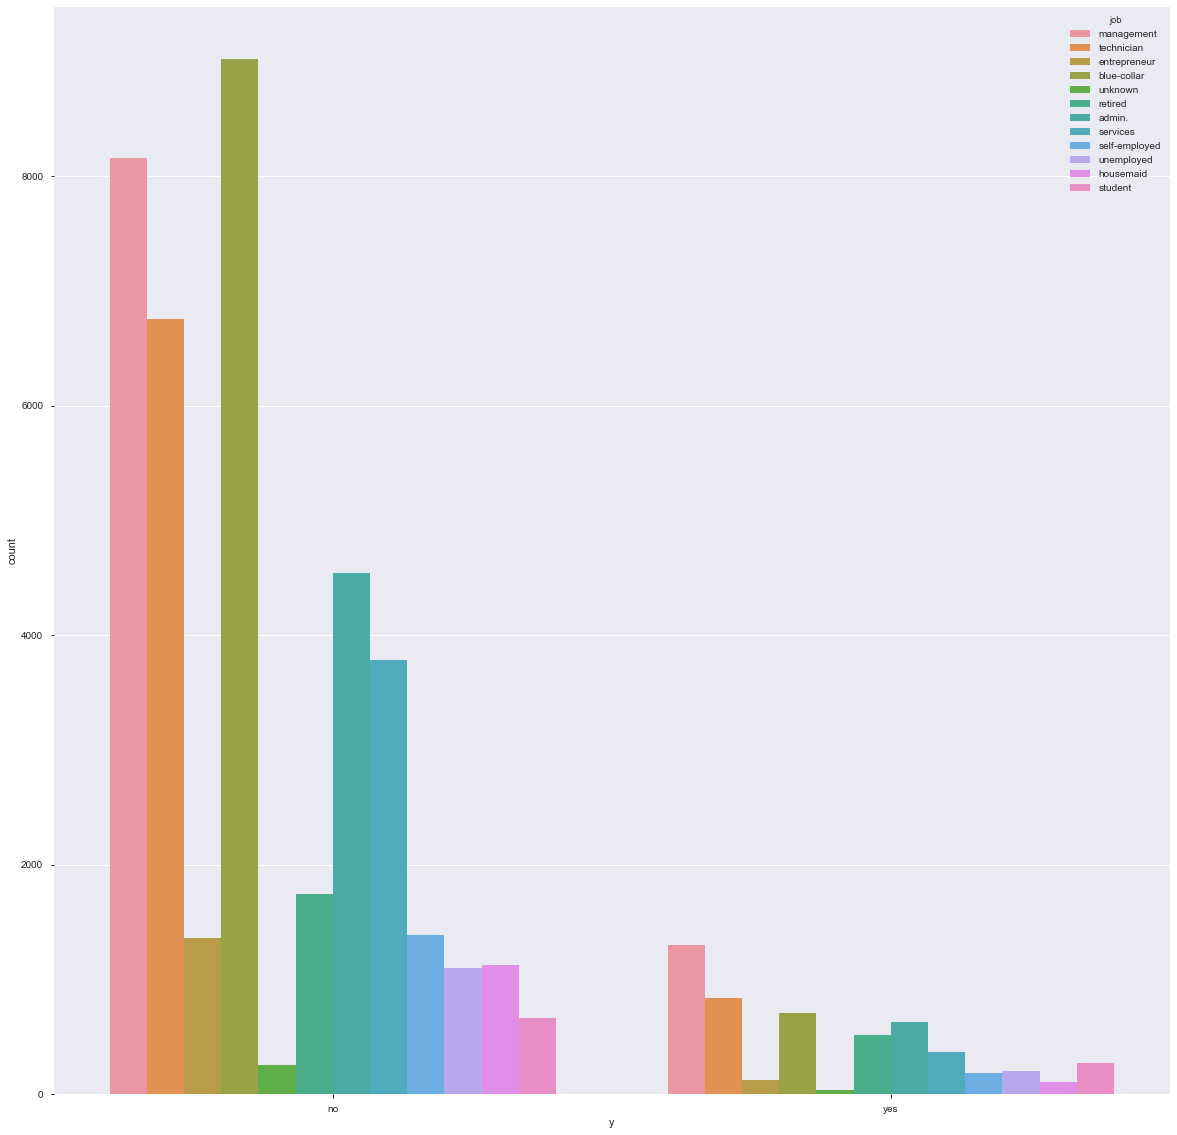

In [346]:
plt.figure(figsize=(20,20))
sns.countplot(data['y'], hue=data['job'])
    

In [347]:
pd.crosstab(data['job'], data['education'])

education,primary,secondary,tertiary,unknown
job,,,,
admin.,209,4219,572,171
blue-collar,3758,5371,149,454
entrepreneur,183,542,686,76
housemaid,627,395,173,45
management,294,1121,7801,242
retired,795,984,366,119
self-employed,130,577,833,39
services,345,3457,202,150
student,44,508,223,163


In [348]:
c = pd.crosstab(data['job'], data['loan'])

In [350]:
data['job'] = ['retired' if x =='unknown' else x for x in data['job']]

In [351]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2552
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

In [352]:
def impute_job(cols):
    job = cols[0]
    if(job == 'blue-collar' or job == 'management' or job == 'entrepreneur'):
        return 'high'
    elif (job == 'admin' or job == 'services' or job == 'technician' or  job == 'self-employed'):
        return 'medium'
    else:
        return 'low'

In [353]:
data['status'] = data[['job']].apply(impute_job, axis=1)

In [354]:
pd.crosstab(data['y'], data['status'], margins=True)

status,high,low,medium,All
y,,,,
no,18545,9443,11934,39922
yes,2132,1761,1396,5289
All,20677,11204,13330,45211


In [355]:
pd.crosstab(data['education'], data['loan'], normalize=True)

loan,no,yes
education,,
primary,0.128885,0.022649
secondary,0.418018,0.095176
tertiary,0.254739,0.039459
unknown,0.038132,0.002942


In [356]:
data['education'] = ['secondary' if x == 'unknown' else x for x in data['education']]

In [357]:
pd.crosstab(data['education'], data['loan'], normalize=True)

loan,no,yes
education,,
primary,0.128885,0.022649
secondary,0.456150,0.098118
tertiary,0.254739,0.039459


In [358]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [359]:
def impute_month(cols):
    mon = cols[0]
    if (mon=='jan' or mon=='feb' or mon=='mar'):
        return 1
    elif(mon=='apr' or mon=='may' or mon=='jun'):
        return 2
    elif(mon=='jul' or mon=='aug' or mon=='sep'):
        return 3
    else:
        return 4

In [360]:
data['month'] = data[['month']].apply(impute_month, axis=1)

In [361]:
data['month'] = pd.to_numeric(data['month'])

In [362]:
pd.crosstab(data['y'], data['job'])

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
y,,,,,,,,,,,
no,4540,9024,1364,1131,8157,2002,1392,3785,669,6757,1101
yes,631,708,123,109,1301,550,187,369,269,840,202


In [363]:
find_category([data])

The feature 'job' has '11' unique values
The feature 'marital' has '3' unique values
The feature 'education' has '3' unique values
The feature 'default' has '2' unique values
The feature 'housing' has '2' unique values
The feature 'loan' has '2' unique values
The feature 'contact' has '3' unique values
The feature 'poutcome' has '4' unique values
The feature 'y' has '2' unique values
The feature 'status' has '3' unique values


In [364]:
import statistics as stats
data['contact'] = ['cellular' if x == 'unknown' else x for x in data['contact']]

In [365]:
data['contact'].value_counts()

cellular     42305
telephone     2906
Name: contact, dtype: int64

In [366]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,status
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,2,261,1,-1,0,unknown,no,high
1,44,technician,single,secondary,no,29,yes,no,cellular,5,2,151,1,-1,0,unknown,no,medium
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,2,76,1,-1,0,unknown,no,high
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,2,92,1,-1,0,unknown,no,high
4,33,retired,single,secondary,no,1,no,no,cellular,5,2,198,1,-1,0,unknown,no,low


In [367]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [368]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [369]:
data.drop(['job', 'poutcome', 'day'], axis=1, inplace=True)

In [370]:
categ = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'y', 'status', 'month']

In [371]:
data.head() 

,age,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,y,status
0,58,married,tertiary,no,2143,yes,no,cellular,2,261,1,-1,0,no,high
1,44,single,secondary,no,29,yes,no,cellular,2,151,1,-1,0,no,medium
2,33,married,secondary,no,2,yes,yes,cellular,2,76,1,-1,0,no,high
3,47,married,secondary,no,1506,yes,no,cellular,2,92,1,-1,0,no,high
4,33,single,secondary,no,1,no,no,cellular,2,198,1,-1,0,no,low


In [372]:
data.balance = [0 if x < 0 else x for x in data['balance']]

In [373]:
# Function to dummy all the categorical variables used for modeling
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False, drop_first=True)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [374]:
data = dummy_df(data, categ)

In [375]:
data.dtypes

age                    int64
balance                int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
marital_married        uint8
marital_single         uint8
education_secondary    uint8
education_tertiary     uint8
default_yes            uint8
housing_yes            uint8
loan_yes               uint8
contact_telephone      uint8
y_yes                  uint8
status_low             uint8
status_medium          uint8
month_2                uint8
month_3                uint8
month_4                uint8
dtype: object

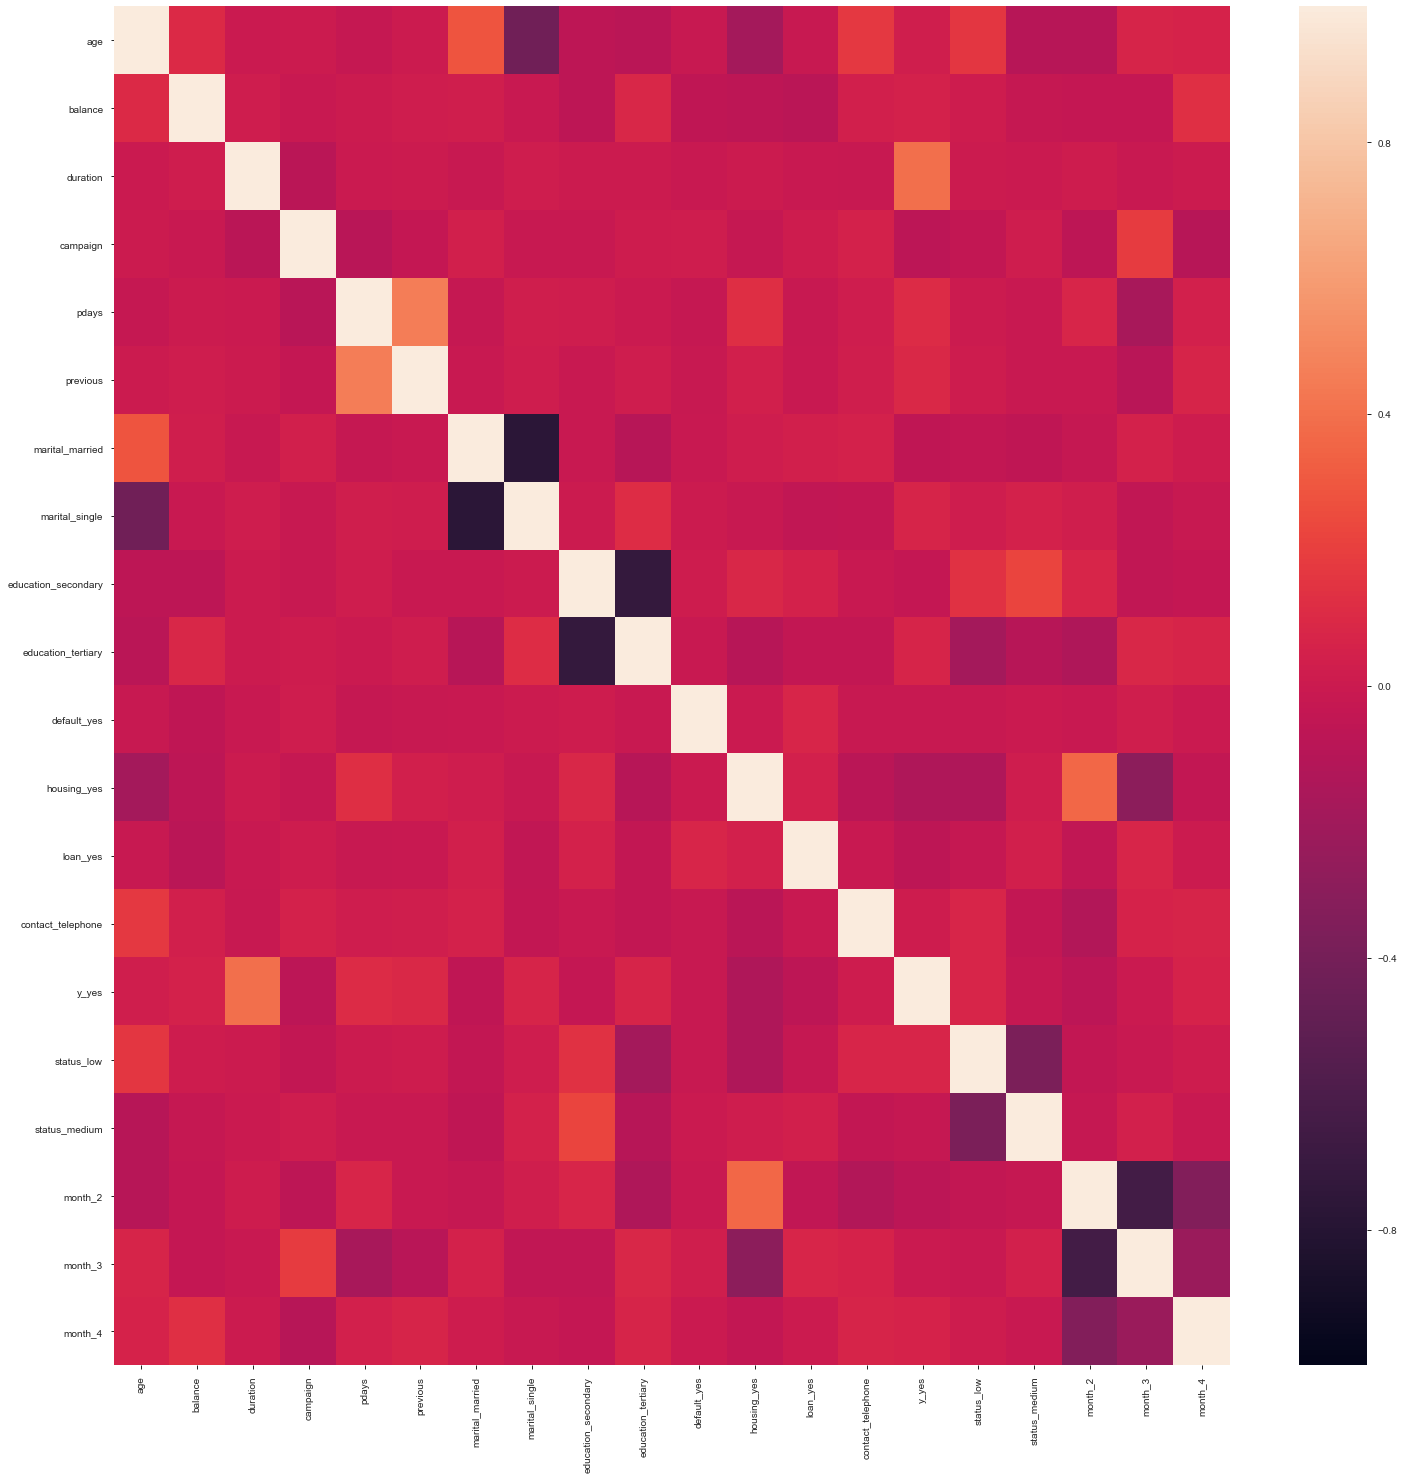

In [376]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(), vmin=-1, vmax=1)

In [377]:
data.corr()

,age,balance,duration,campaign,pdays,previous,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,contact_telephone,y_yes,status_low,status_medium,month_2,month_3,month_4
age,1.000000,0.097730,-0.004648,0.004760,-0.023758,0.001288,0.286257,-0.427817,-0.066689,-0.081629,-0.017879,-0.185513,-0.015655,0.170349,0.025155,0.161979,-0.101208,-0.098132,0.065622,0.059278
balance,0.097730,1.000000,0.021325,-0.014164,0.002730,0.016018,0.026306,-0.013739,-0.064951,0.083429,-0.057112,-0.065279,-0.079532,0.036993,0.051370,0.009239,-0.029581,-0.037209,-0.038617,0.126724
duration,-0.004648,0.021325,1.000000,-0.084570,-0.001565,0.001203,-0.022683,0.020328,0.001823,0.000891,-0.010021,0.005075,-0.012412,-0.023201,0.394521,0.003068,-0.003648,0.012811,-0.013737,0.004843
campaign,0.004760,-0.014164,-0.084570,1.000000,-0.088628,-0.032855,0.031371,-0.023120,-0.018732,0.012866,0.016822,-0.023599,0.009980,0.053895,-0.073172,-0.042319,0.016253,-0.067709,0.185327,-0.100505
pdays,-0.023758,0.002730,-0.001565,-0.088628,1.000000,0.454820,-0.027600,0.027943,0.019471,-0.007568,-0.029979,0.124178,-0.022754,0.016006,0.103621,0.006438,-0.011604,0.070757,-0.166559,0.040694
previous,0.001288,0.016018,0.001203,-0.032855,0.454820,1.000000,-0.012691,0.017006,-0.008932,0.022888,-0.018329,0.037076,-0.011043,0.028097,0.093236,0.010499,-0.008797,-0.011406,-0.088359,0.064422
marital_married,0.286257,0.026306,-0.022683,0.031371,-0.027600,-0.012691,1.000000,-0.772357,-0.013986,-0.096019,-0.014460,0.017681,0.036906,0.048970,-0.060260,-0.043963,-0.056661,-0.025765,0.052961,0.015274
marital_single,-0.427817,-0.013739,0.020328,-0.023120,0.027943,0.017006,-0.772357,1.000000,0.005524,0.110915,0.003115,-0.020475,-0.051716,-0.040468,0.063526,0.017907,0.053096,0.023801,-0.050480,-0.021192
education_secondary,-0.066689,-0.064951,0.001823,-0.018732,0.019471,-0.008932,-0.013986,0.005524,1.000000,-0.719949,0.012801,0.083224,0.051059,-0.010107,-0.031779,0.139040,0.225013,0.074827,-0.051405,-0.033018
education_tertiary,-0.081629,0.083429,0.000891,0.012866,-0.007568,0.022888,-0.096019,0.110915,-0.719949,1.000000,-0.015239,-0.099175,-0.045940,-0.044719,0.066448,-0.183727,-0.097794,-0.135257,0.081536,0.062796


In [378]:
x = data.drop(['y_yes'], axis=1)
y = data['y_yes']

## Random Forest Classifier

In [379]:
from sklearn.ensemble import RandomForestClassifier

In [380]:
rfc = RandomForestClassifier(n_estimators=300, oob_score=True)

In [381]:
import sklearn.model_selection as md

In [382]:
x_train, x_test, y_train, y_test = md.train_test_split(x, y, test_size=0.2, random_state= 143)

In [383]:
for w in range(10, 400, 40):
    gd = RandomForestClassifier(oob_score=True, n_estimators=w, random_state=400)
    gd.fit(x_train, y_train)
    print(w)
    print( gd.oob_score_)

10
0.8809168325591683
50
0.8910362751603628
90
0.8934140676841407
130
0.8943264764432648
170
0.8944094226940942
210
0.894796505197965
250
0.894796505197965
290
0.8950176952001769
330
0.8951006414510064
370
0.8951006414510064


In [384]:
gd = RandomForestClassifier(oob_score=True, n_estimators=290, random_state=1900)
gd.fit(x_train, y_train)
print( gd.oob_score_)

0.894796505197965


In [385]:
predictions = gd.predict(x_test)

In [386]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [387]:
accuracy_score(y_test, predictions)

0.8968262744664381

In [388]:
c = confusion_matrix(y_test, predictions)

In [389]:
mat= pd.DataFrame(c, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
               

In [390]:
mat

,Predicted neg,Predicted pos
Actual neg,7746,227
Actual pos,706,364


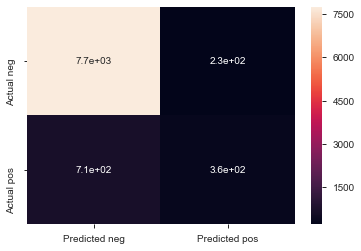

In [391]:
sns.heatmap(mat, annot=True)

In [392]:
from sklearn.metrics import roc_curve, roc_auc_score

In [393]:
z=gd.predict_proba(x_test)[::,1]

In [394]:
score = roc_auc_score(y_test, z)
score

0.8984957994915082

In [395]:
fpr, tpr, threshold = roc_curve(y_test, z)

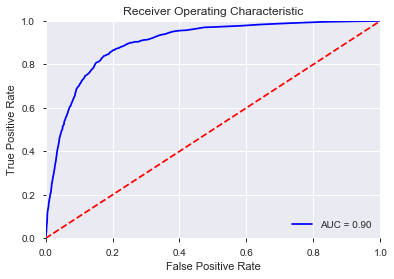

In [396]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [397]:
gd.feature_importances_

array([0.1504153 , 0.15757371, 0.34206471, 0.05271846, 0.07040502,
       0.03611105, 0.01351795, 0.01101053, 0.0147329 , 0.01472957,
       0.00266042, 0.03016542, 0.01293223, 0.00995113, 0.01549387,
       0.01734799, 0.01563375, 0.02055797, 0.01197802])

In [398]:
pd.Series(gd.feature_importances_,index=x.columns.tolist()).sort_values(ascending = False)


duration               0.342065
balance                0.157574
age                    0.150415
pdays                  0.070405
campaign               0.052718
previous               0.036111
housing_yes            0.030165
month_3                0.020558
status_medium          0.017348
month_2                0.015634
status_low             0.015494
education_secondary    0.014733
education_tertiary     0.014730
marital_married        0.013518
loan_yes               0.012932
month_4                0.011978
marital_single         0.011011
contact_telephone      0.009951
default_yes            0.002660
dtype: float64

## Logistic Regression using Stats model.

In [399]:
import statsmodels.api as sm
import sklearn.model_selection as md


In [400]:
x_train, x_test, y_train, y_test = md.train_test_split(x, y, test_size=0.2, random_state=156)

In [401]:
x_train.head()

,age,balance,duration,campaign,pdays,previous,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,contact_telephone,status_low,status_medium,month_2,month_3,month_4
15989,47,228,89,1,-1,0,1,0,0,1,0,1,0,0,1,0,0,1,0
35802,36,0,52,1,-1,0,1,0,0,1,0,1,0,0,0,1,1,0,0
29147,41,0,108,2,-1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
44420,93,775,476,2,13,9,1,0,1,0,0,0,0,0,1,0,0,1,0
9692,35,0,119,1,-1,0,0,1,0,1,0,1,1,0,1,0,1,0,0


In [402]:
x_train.isnull().sum()

age                    0
balance                0
duration               0
campaign               0
pdays                  0
previous               0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
status_low             0
status_medium          0
month_2                0
month_3                0
month_4                0
dtype: int64

In [403]:
x_train = sm.add_constant(x_train)

In [404]:
mod = sm.GLM(y_train, x_train, family = sm.families.Binomial())

In [405]:
result = mod.fit()

In [406]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  y_yes   No. Observations:                36168
Model:                            GLM   Df Residuals:                    36148
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9829.7
Date:                Wed, 09 Oct 2019   Deviance:                       19659.
Time:                        10:15:49   Pearson chi2:                 1.82e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.2142    

In [407]:
x_train.drop(['month_4', 'status_medium', 'contact_telephone', 'default_yes', 'marital_married'], inplace=True, axis=1)
x_train = sm.add_constant(x_train)

In [408]:
updated_mod = sm.GLM(y_train, x_train, family = sm.families.Binomial())

In [409]:
result2 = updated_mod.fit()

In [410]:
print(result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  y_yes   No. Observations:                36168
Model:                            GLM   Df Residuals:                    36153
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9832.1
Date:                Wed, 09 Oct 2019   Deviance:                       19664.
Time:                        10:15:49   Pearson chi2:                 1.79e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.3172    

In [411]:
x_test = x_test.drop(['month_4', 'status_medium', 'contact_telephone', 'default_yes', 'marital_married'], axis=1)
x_test = sm.add_constant(x_test)

In [412]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [413]:
pred = result2.predict(x_test)

In [414]:
prediction = [1 if x > 0.5 else 0 for x in pred]

In [415]:
accuracy = sum(prediction == y_test)/len(y_test)

In [416]:
accuracy_score(y_test, prediction)

0.8919606325334513

In [417]:
roc_auc_score(y_test, pred)

0.8648722435282838

## Logistic model using Scikit Learn

In [418]:
from sklearn.linear_model import LogisticRegression

In [419]:
x_train, x_test, y_train, y_test = md.train_test_split(x, y, test_size = 0.2, random_state = 123)

In [420]:
lr = LogisticRegression()

In [421]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [422]:
predic = lr.predict_proba(x_test)[::,1]

In [423]:
prd = lr.predict(x_test)

In [424]:
accuracy_score(y_test, prd)

0.8876479044564857

In [425]:
fpr, tpr, threshold = roc_curve(y_test, predic)

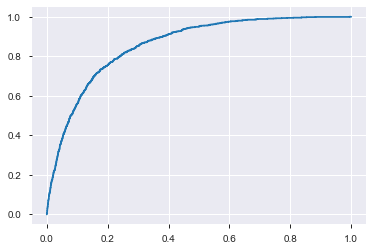

In [426]:
plt.plot(fpr, tpr, '-')

In [427]:
roc_auc_score(y_test, predic)

0.8585001282992635

In [428]:
from sklearn.tree import DecisionTreeClassifier

In [429]:
d = DecisionTreeClassifier(random_state=145)

In [430]:
import sklearn.model_selection as md

In [431]:
x_train, x_test, y_train, y_test = md.train_test_split(x, y, test_size=0.2, random_state = 543)

In [432]:
gd = md.GridSearchCV(estimator=d, param_grid = [{"max_depth" : [2, 3, 4, 5, 6]}], cv=10)

In [433]:
gd.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=145,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [2, 3, 4, 5, 6]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
  

In [434]:
gd.best_params_

{'max_depth': 5}

In [435]:
gd.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=145, splitter='best')

In [436]:
gd.score(x_test, y_test)

0.8925135463894726

In [437]:
prob = gd.predict_proba(x_test)[::,1]

In [438]:
roc_auc_score(y_test, prob)

0.8593464816807921

In [439]:
accuracy_score(y_test, gd.predict(x_test))

0.8925135463894726

In [440]:
fpr, tpr, threshold = roc_curve(y_test, prob)

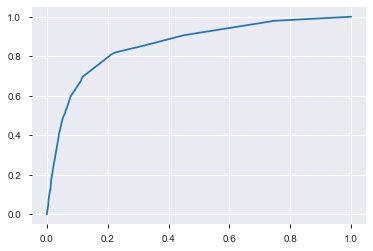

In [441]:
plt.plot(fpr, tpr, '-')